# AirBnB Take Home Challenge: Predicting Booking

## Section I: Cleaning Data, Data Analysis, Feature Engineering, Base Model

In this section, we read in data, do exploration analysis, understand missing values, do missing value imputation, do feature engineering, and build a base model.
<br>
<br>
After we read in the dataset, we first do exploration data analysis to understand the dataset and to see whether there is any data issue. We see the number of total listings, listings by market, book rate, listing prices, etc. Then, we look into missing data. For each of the feature with missing data, we plot histogram and understand its distributions. Based on business background and assumptions, we do missing data imputation for each of the features with missing values. During this process, we also identify some data issues, such as larger than 300 days minimum_nights. Next, we do feature engineering to create new features, such as is_weekend, is_holiday, true_price, etc. For features that have long tail distributions, we do a log transformation to make it more close to normal distribution. Upon the finish of missing data imputation, we select some features (base_columns) to build a base model. 
<br>
<br>
For model building, we first treat all three markets the same and choose some features from each of the categories. This is a binary classification model, so we choose RandomForestClassifier and LogisticRegression as our model candidates. Before model building, we do normalizations of all features. After model fitting and comparison, we stick with LogisticRegression model for all further modeling. LogisticRegression has the advantages of output probabilities directly and easy of interpratation. If we have more time, we can try other models, such as xgboost tree. 
<br>
<br>
For evaluation of the model, we choose F1 score as our metric. F1 score includes both precision and recall. High precision means less False Positives, high recall means less False negatives. For AirBnB, we want to have less False Positives, as we put our efforts and resourses into predicted-booked listings, False Positives leads to cost with no return. As we can see in the final precision, recall and F1 curve, we can always achieve high precision by having high threshold, however, the recall will decrease at the same time. So, we choose F1 score as our metric to improve model and choose threshold. For the base model, we can reach the best result of F1 score of 0.637 and precision of 0.554.

#### Base model assumptions:
  1. San Francisco, Paris and Los Angeles markets are the same in this model.
  <br>
  <br>
  2. Holiday bookings will be different, but we treat all holidays equally. When we create a feature to say whether it is a holiday, it should be decided from user side. However, we do not have user demogrphics information, we will decide from market side.
  <br>
  <br>
  3. m_pricing_cleaning_fee is a daily cleaning fee, which is not included in m_effective_daily_price.
 
## Section II: Understanding Data And Improving Model

In this section, we improve our model based on **Section I**. We include more features, build separate models for separate markets, create additional features, and do grid search and cross validation to fine tune the model.
  <br>
  <br>
In additonal to the features in **base_columns**, we try more features with **more_columns**. This improves our model. Further more, we analyze booking rates by market, by room type and by day. We find that the three markets are very different from each other in the overall booking rate and booking rate by day. So we decide to build three separate models for these three markets. As we oberserve seasonality in Paris market, we create an additional feature, **peak_season**. We also do correlation analysis between features and remove redundant highly correlated features. As an example, we find **m_total_overall_rating** and **m_reviews** are highly correlated. For the final model, we use **improved_columns**.
  <br>
  <br>
For fine tuning of the model, we do extensive grid search and cross validations. Different regularizations, different metrics, different solvers are all tried in the LogisticRegressionCV. After hyper parameter tuning, we also vary the threshold to see how F1 score, precision and recall changes and choose the best threshold for booking prediction. For the current model, we can reach the best result of F1 score 0.716 and precision 0.645.
  <br>
  <br>
Among the three markets, Paris has the worst model performance while Los Angeles has the best model performance. Different market in different country can be very different. It is worth to have more studies and researches to understand Paris market and to improve its model performance.  
  <br>
  <br>
Finally, we look into the coefficients of each of the features and the importance of each of the features.   

## Section III: Conclusion And Suggestions
  
We build a logistic regression model to predict whether a listing will be booked or not 30 days before. The output of the model is a probability between 0 and 1, with 1 to be booked and 0 to be not booked. The probability can be used by search team or recommendation team when they decide what listings to be shown to guests when the guests are looking for their next stays. The listings with higher probabilities have higher priority to be shown to guests in their search or recommendation listings. Based on analysis of the data and modeling of the problem, we have the following suggestions.  

### Suggestions

Based on data:
  1. There is no information about guests when they view and book listings. Guests information will be very important in building a better model. Guests information includes demographics, access information (mobile or web, ip, etc.) and past guests activities. 

Based on the analysis:
  1. Look into listing information accuracy, such as zero or negative effective listing prices and m_minimum_nights > 300 days.
<br>
<br>
  2. Look into KDT nodes clustering and its information accuracy. We notice a significant portion of listings have the difference between r_kdt_m_effective_daily_price_available_n100_p50 and m_effective_daily_price larger than 1000 USD.
<br>
<br>
  3. **p2_p3_click_through_score** and **p3_inquiry_score** have 2/3 data missing. As they have big impact on booking rate, we should improve Data Engineer to collect these data for all listings. 

Based on model results:
  1. log_listing_views, or **listing_m_listing_views_2_6_ds_night_decay**, is the most important feature. The larger this feature, the more likely to be booked. Thus, it is very important to have good exposure/visibility of listings to potential guests who are interested in these listings when guests are doing search and viewing listings.
<br>
<br>
  2. log_true_price, or **true_price = (m_pricing_cleaning_fee + m_effective_daily_price) / dim_person_capacity**, is the most importance feature in the negative way. It means that price of the listing is very important to determine whether a listing will be booked or not. Based on this observation, we can propose **listing price predictions** and **listing price optimization** projects. 
<br>
<br>
  3. log_total_overall_rating, or **m_total_overall_rating**, is important feature. The more overall ratings, the more likely a listing will be booked. So, we should design products/frameworks to ecourage guests to leave overall ratings after their stays. However, we do not have the rating scores here, which will also be important in the prediction model. It is recommended to have this feature available in Data Engineering.
<br>
<br>
  4. **image_quality_score** has positive impact while **m_professional_pictures** has negative impact. This is a little bit confusing. The correlation between **image_quality_score** and **m_professional_pictures** is 0.39 which is not high. If possible, we would love to dig into this issue and design A/B testing experiments if neccesary. 
<br>
<br>
  5. **dim_has_wireless_internet** has positive impact, so we should ecourage hosts to have wireless available for their listings. 
<br>
<br>
  6. log_minimum_nights, or **m_minimum_nights**, has negative impact on booking. There is minimum_nights over 300 in the dataset, we should identify these information in our system to find any mistakes. At the same time, we should talk with hosts about this impact of minimum nights. 
  
### Other Usages Of The Dataset

With these dataset, we can also do some other projects/analysis.

  1. listing price predictions
  <br>
  Listing price is very important information among all other listing features. We can use the dataset to predict listing prices for each of the listings. The predicted listing prices can be used as suggestions for hosts and can also be used as base line to verify the listing information.
  <br>
  <br>
  2. listing price anomoly detection
  <br>
  This is another direction related to listing price. During data analysis, we find that there are wired listing prices in the dataset. We can do listing price anomoly detection to identify anomoly listing prices.
  <br>
  <br>
  3. optimization of listing price
  <br>
  We see in the model that listing price is very important on determine the booking rate. From the model, the lower the listing price, the high the booking rate. However, we do not want the listing prices to be too low as we want to have more profit for AirBnB and more earnings for hosts. So, we can do a listing price optimization to achieve this. 
  <br>
  <br>
  4. listing analysis
  <br>
     Some listings have high book rate, some listings have high frequency of listing. We can do a listing analysis to understand the listings. One way of doing listing analysis can be clustering analysis.  
  <br>
  5. booking pattern analysis
  <br>
  There is seasonality in booking rate in Paris if we aggregate booking rate by date. We can do more analysis on this to understand booking patterns in each market. Understanding booking patterns can help AirBnB make better business decisions.
  <br>
  <br>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import math
%matplotlib inline

## Section I: Cleaning Data, Data Analysis, Feature Engineering, Base Model

### Read In Dataset and Check Data Quality

In [2]:
df = pd.read_csv('TH_data_challenge.tsv', sep='\t', header=0)

In [3]:
# All features and dependent variable names
df.columns

Index(['dim_is_requested', 'ds_night', 'ds', 'id_listing_anon', 'id_user_anon',
       'm_effective_daily_price', 'm_pricing_cleaning_fee', 'dim_market',
       'dim_lat', 'dim_lng', 'dim_room_type', 'dim_person_capacity',
       'dim_is_instant_bookable', 'm_checkouts', 'm_reviews',
       'days_since_last_booking', 'cancel_policy', 'image_quality_score',
       'm_total_overall_rating', 'm_professional_pictures',
       'dim_has_wireless_internet', 'ds_night_day_of_week',
       'ds_night_day_of_year', 'ds_checkin_gap', 'ds_checkout_gap',
       'occ_occupancy_plus_minus_7_ds_night',
       'occ_occupancy_plus_minus_14_ds_night', 'occ_occupancy_trailing_90_ds',
       'm_minimum_nights', 'm_maximum_nights', 'price_booked_most_recent',
       'p2_p3_click_through_score', 'p3_inquiry_score',
       'listing_m_listing_views_2_6_ds_night_decay',
       'general_market_m_unique_searchers_0_6_ds_night',
       'general_market_m_contacts_0_6_ds_night',
       'general_market_m_reservation_r

In [4]:
# Check missing values.
df.isnull().sum()

dim_is_requested                                           0
ds_night                                                   0
ds                                                         0
id_listing_anon                                            0
id_user_anon                                               0
m_effective_daily_price                                    0
m_pricing_cleaning_fee                                     0
dim_market                                                 0
dim_lat                                                    0
dim_lng                                                    0
dim_room_type                                              0
dim_person_capacity                                        0
dim_is_instant_bookable                                    0
m_checkouts                                              187
m_reviews                                                187
days_since_last_booking                                37836
cancel_policy           

In [5]:
# Number of total listings, unique listings and users.

print('Total number of listings in the dataset: %d.'%len(df))
print('Unique number of listings: %d.'%len(df.id_listing_anon.unique()))
print('Unique number of users: %d.'%len(df.id_user_anon.unique()))

Total number of listings in the dataset: 184279.
Unique number of listings: 10442.
Unique number of users: 7936.


In [6]:
# Number of listings in each market.

print('Total number of listings in Paris: %d.'%len(df[df.dim_market == 'Paris']))
print('Total number of listings in SF: %d.'%len(df[df.dim_market == 'San Francisco']))
print('Total number of listings in LA: %d.'%len(df[df.dim_market == 'Los Angeles']))

Total number of listings in Paris: 113704.
Total number of listings in SF: 17877.
Total number of listings in LA: 52698.


### Listing price analysis

#### Remark:
The listings with price smaller than $10 are worth looking into. Due to the time limit and the small percentange of these listings, we treat them the same as other listings.  

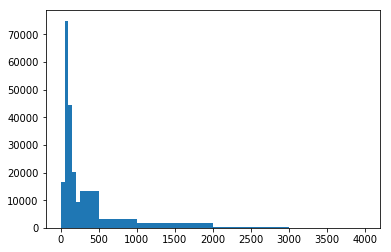

In [7]:
# Analyze listing price

counts, bins, fig = plt.hist(df.m_effective_daily_price, bins=[0,1,50,100,150,200,250,500,1000,2000,3000,4000])

In [8]:
print('Number of listings with price < 0: %d'%len(df[df.m_effective_daily_price < 0]))
print('Number of listings with price == 0: %d'%len(df[df.m_effective_daily_price == 0]))
print('Number of listings with price in (0, 1]: %d'%len(df[(df.m_effective_daily_price > 0) & 
                                                           (df.m_effective_daily_price <= 1)]))
print('Number of listings with price in (1, 10]: %d'%len(df[(df.m_effective_daily_price > 1) & 
                                                           (df.m_effective_daily_price <= 10)]))
print('listing price < 10 ratio: %.4f'%(len(df[df.m_effective_daily_price <= 10]) / len(df)))

Number of listings with price < 0: 14
Number of listings with price == 0: 48
Number of listings with price in (0, 1]: 33
Number of listings with price in (1, 10]: 35
listing price < 10 ratio: 0.0007


### Book Rate

#### Remark:
The booking rate is 32.8%. Need to compare with the hotel booking rate standard to see whether it is low or high.

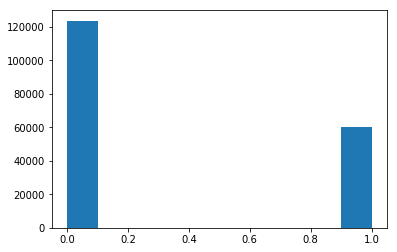

In [9]:
# How the booking looks like for all the listings

counts, bins, fig = plt.hist(df.dim_is_requested)

### Dealing with missing data

Each of the columns with missing data are visualized and analyzed. The missing values are filled with zero or mean values depending on the assumptions/scenarios:
1. Zero, assumption is missing due to no records/activities
2. Median, assumption is missing due to ETL or data engineering

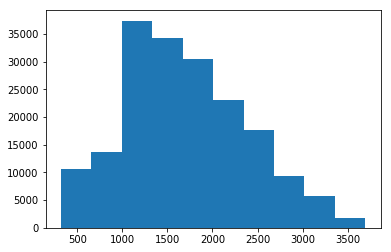

In [10]:
couts, bins, fig = plt.hist(df[df['general_market_m_unique_searchers_0_6_ds_night'].notnull()]['general_market_m_unique_searchers_0_6_ds_night'])

In [11]:
# Missing data imputation
# Assumption: 
# 1. NA in m_checkouts and m_reviews is due to no checkouts or reviews.
# 2. NA in m_professional_pictures is due to no professional pictures.
# 3. ...

kdt_active = df.r_kdt_n_active_n100.median()
kdt_views = df.r_kdt_listing_views_0_6_avg_n100.median()
kdt_available = df.r_kdt_n_available_n100.median()
image_score = df.image_quality_score.median()

df = df.fillna({'m_checkouts':0,'m_reviews':0,'m_professional_pictures':0, 'm_total_overall_rating':0, 
               'ds_checkin_gap':0, 'ds_checkout_gap':0, 'occ_occupancy_plus_minus_7_ds_night':0, 
                'm_minimum_nights':1, 'p2_p3_click_through_score':0, 'p3_inquiry_score':0, 
               'listing_m_listing_views_2_6_ds_night_decay':0, 'r_kdt_listing_views_0_6_avg_n100':kdt_views,
               'r_kdt_n_active_n100':kdt_active, 'r_kdt_n_available_n100':kdt_available, 
               'image_quality_score':image_score}, inplace=True)

### Other Data Issues
  1. Larger than 300 days in m_minimum_nights

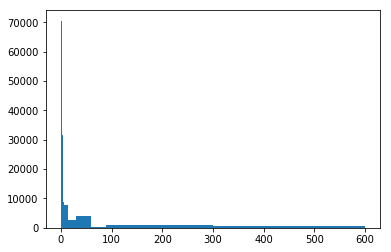

In [12]:
# Distribution of m_minimum_nights

counts, bins, fig = plt.hist(df[df.m_minimum_nights.notnull()]['m_minimum_nights'], 
                            bins=[0,1,2,3,4,5,6,7,14,30,60,90,300,600])

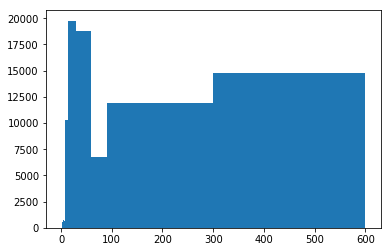

In [13]:
# Distribution of m_maximum_nights

counts, bins, fig = plt.hist(df[df.m_maximum_nights.notnull()]['m_maximum_nights'],
                            bins=[0,1,2,3,4,5,6,7,14,30,60,90,300,600])

### Correlation analysis between features

In [14]:
df_corr = df.corr()
df_corr = df_corr[abs(df_corr) > 0.3]
df_corr.to_csv('feature_correlation.csv')
df_corr

,dim_is_requested,m_effective_daily_price,m_pricing_cleaning_fee,dim_lat,dim_lng,dim_person_capacity,dim_is_instant_bookable,m_checkouts,m_reviews,days_since_last_booking,...,general_market_m_reservation_requests_0_6_ds_night,general_market_m_is_booked_0_6_ds_night,m_available_listings_ds_night,kdt_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_n_active_n100,r_kdt_n_available_n100,r_kdt_m_effective_daily_price_n100_p50,r_kdt_m_effective_daily_price_available_n100_p50,r_kdt_m_effective_daily_price_booked_n100_p50
dim_is_requested,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_effective_daily_price,NaN,1.000000,0.422933,NaN,NaN,0.386296,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.428470,0.427590,0.325442
m_pricing_cleaning_fee,NaN,0.422933,1.000000,-0.356588,-0.355041,0.489852,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.301679,NaN,NaN,NaN,NaN,0.513780,0.509129,0.450861
dim_lat,NaN,NaN,-0.356588,1.000000,0.986279,NaN,NaN,NaN,NaN,NaN,...,0.648400,NaN,0.841324,NaN,NaN,NaN,NaN,-0.346215,-0.340572,-0.334183
dim_lng,NaN,NaN,-0.355041,0.986279,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.682546,NaN,0.886023,NaN,NaN,NaN,NaN,-0.355447,-0.351146,-0.354561
dim_person_capacity,NaN,0.386296,0.489852,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dim_is_instant_bookable,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_checkouts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.972678,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972678,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_since_last_booking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


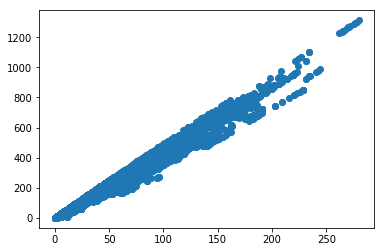

In [15]:
# Correlation analysis between m_reviews and m_total_overall_rating.

plt.scatter(df['m_reviews'], df['m_total_overall_rating'])

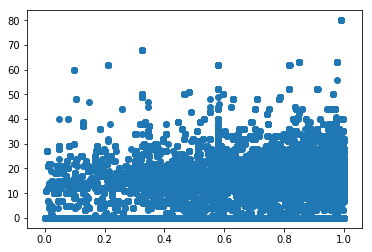

In [16]:
# Correlation analysis between image_quality_score and m_professional_pictures.

plt.scatter(df['image_quality_score'], df['m_professional_pictures'])

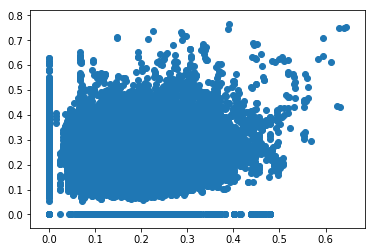

In [17]:
# Correlation analysis between p3_inquiry_score and p2_p3_click_through_score.

plt.scatter(df['p3_inquiry_score'], df['p2_p3_click_through_score'])

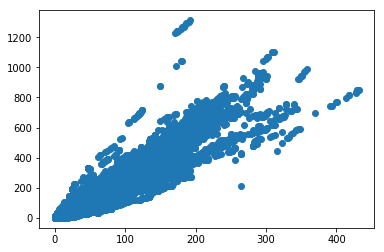

In [18]:
# Correlation analysis between m_checkouts and m_total_overall_rating.

plt.scatter(df['m_checkouts'], df['m_total_overall_rating'])

### Feature engineering

Create additional features:
1. is_weekend, whether ds_night is a weekend or not
2. is_holiday, whether ds_night is a holiday in its market
3. clean_ratio, m_pricing_cleaning_fee / m_effective_daily_price
4. dummy variables for room types

Log transfer of features with long tails.
1. m_minimum_nights
2. listing_m_listing_views_2_6_ds_night_decay
3. r_kdt_listing_views_0_6_avg_n100
4. ...

In [19]:
# Transfer Dependent variable into number

df['dim_is_requested'] = df['dim_is_requested'].map(lambda x: 1 if x else 0)

In [20]:
# Weekend and weekday bookings will be different
# Create a feature to indicate whether it is a weekend

def is_weekend(x):
    if x in [5,6,0]:
        return 1
    else:
        return 0
    
df['is_weekend'] = df.ds_night_day_of_week.map(lambda x: is_weekend(x))

In [21]:
# Holiday and Non-holiday bookings will be different
# Create a feature to indicate whether it is a holiday
# The holiday dates are from online search.

def is_holiday(date, market):
    
    us_holidays = ['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07', 
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25']
    france_holidays = ['2015-01-01', '2015-04-03', '2015-04-06', '2015-05-01', '2015-05-08', '2015-05-14', 
                  '2015-05-25', '2015-05-31', '2015-06-21', '2015-07-14', '2015-08-15', '2015-11-01',
                  '2015-11-11', '2015-12-25', '2015-12-26']

    if market == 'Paris' and date in france_holidays:
        return 1
    elif market in ['San Francisco', 'Los Angeles'] and date in us_holidays:
        return 1
    else:
        return 0

df['is_holiday'] = df[['ds_night', 'dim_market']].apply(lambda x: is_holiday(x[0], x[1]), axis = 1)

In [22]:
# Create a feature, clean_ratio = m_pricing_cleaning_fee / m_effective_daily_price
# Absolute clean fee is misleading

def clean_ratio(fee, price):
    if fee == 0:
        return 0
    elif price <= 0:
        return 1
    else:
        return min(fee / price, 1)

df['clean_ratio'] = df[['m_pricing_cleaning_fee', 
                        'm_effective_daily_price']].apply(lambda x: clean_ratio(x[0], x[1]), axis = 1)

In [23]:
# Create a feature, true_price = (m_pricing_cleaning_fee + m_effective_daily_price) / dim_person_capacity

def true_price(fee, price, number):
    return (fee + price) / number

df['true_price'] = df[['m_pricing_cleaning_fee', 'm_effective_daily_price',
                      'dim_person_capacity']].apply(lambda x: true_price(x[0], x[1], x[2]), axis = 1)

In [24]:
# Create a feature to indicate availability of the listing

df['available_ratio'] = df['r_kdt_n_available_n100'] * 100 / df['m_available_listings_ds_night']

# Transfer available_ratio columns as it has long tails in its values.
df['log_available_ratio'] = df['available_ratio'].map(lambda x: math.log(x + 1))

In [25]:
# Create dummy variables for room types.

df = df.join(pd.get_dummies(df.dim_room_type))
df.rename(columns={'Private room':'private_room', 'Entire home/apt':'home', 'Shared room':'shared_room'}, inplace=True)

In [26]:
# Transfer m_minimum_nights columns as it has long tails in its values.
df['log_minimum_nights'] = df['m_minimum_nights'].map(lambda x: math.log(x))

# Transfer m_minimum_nights columns as it has long tails in its values.
df['log_listing_views'] = df['listing_m_listing_views_2_6_ds_night_decay'].map(lambda x: math.log(x + 1))

# Transfer r_kdt_listing_views_0_6_avg_n100 columns as it has long tails in its values.
df['log_kdt_views'] = df['r_kdt_listing_views_0_6_avg_n100'].map(lambda x: math.log(x + 1))

# Transfer r_kdt_n_active_n100 columns as it has long tails in its values.
df['log_kdt_active'] = df['r_kdt_n_active_n100'].map(lambda x: math.log(x + 1))

# Transfer r_kdt_n_available_n100 columns as it has long tails in its values.
df['log_kdt_available'] = df['r_kdt_n_available_n100'].map(lambda x: math.log(x + 1))

# Transfer m_checkouts columns as it has long tails in its values.
df['log_m_checkouts'] = df['m_checkouts'].map(lambda x: math.log(x + 1))

# Transfer m_reviews columns as it has long tails in its values.
df['log_m_reviews'] = df['m_reviews'].map(lambda x: math.log(x + 1))

# Transfer m_total_overall_rating columns as it has long tails in its values.
df['log_total_overall_rating'] = df['m_total_overall_rating'].map(lambda x: math.log(x + 1))

# Transfer m_professional_pictures columns as it has long tails in its values.
df['log_professional_pictures'] = df['m_professional_pictures'].map(lambda x: math.log(x + 1))

# Transfer true_price columns as it has long tails in its values.
df['log_true_price'] = df['true_price'].map(lambda x: math.log(x + 1))

#### Feature engineering related to r_kdt_m_effective_daily_price_available_n100_p50.

##### Remark
1. Need to look into r_kdt_m_effective_daily_price_available_n100_p50
2. It's not used in the model.

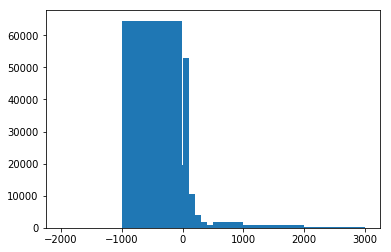

In [27]:
# Create a feature to compare effective daily price with r_kdt_m_effective_daily_price_available_n100_p50.

def price_diff(price, median):
    if math.isnan(median):
        return price / 2
    else:
        return price - median
        
df['price_diff'] = df[['m_effective_daily_price', 
                       'r_kdt_m_effective_daily_price_available_n100_p50']].apply(lambda x: price_diff(x[0],x[1]),
                                                                                 axis=1)

# Transfer price_diff columns as it has long tails in its values.
t_m = df['price_diff'].min()
df['log_price_diff'] = df['price_diff'].map(lambda x: math.log(x + 1 - t_m))

counts, bins, fig = plt.hist(df['price_diff'], bins=[-2000, -1000, -10, 0, 10, 100, 200, 300, 400, 500, 1000, 2000, 3000])

In [28]:
base_columns = ['dim_is_requested', 'clean_ratio', 'log_true_price', 'dim_person_capacity',
               'private_room', 'home', 'shared_room', 'dim_is_instant_bookable',
               'image_quality_score', 'log_professional_pictures', 'ds_checkin_gap', 
                'ds_checkout_gap', 'occ_occupancy_plus_minus_7_ds_night', 'log_minimum_nights', 
                'p2_p3_click_through_score', 'p3_inquiry_score', 'log_listing_views', 
                'general_market_m_unique_searchers_0_6_ds_night', 'm_available_listings_ds_night', 
               'kdt_score']
more_columns = ['dim_is_requested', 'is_weekend', 'is_holiday', 'clean_ratio', 'log_true_price', 'dim_person_capacity',
               'private_room', 'home', 'shared_room', 'dim_is_instant_bookable', 'log_m_checkouts', 'log_m_reviews', 
               'image_quality_score', 'log_total_overall_rating', 'dim_has_wireless_internet', 
                'log_professional_pictures', 'ds_checkin_gap', 
                'ds_checkout_gap', 'occ_occupancy_plus_minus_7_ds_night', 'log_minimum_nights', 
                'p2_p3_click_through_score', 'p3_inquiry_score', 'log_listing_views', 'kdt_score', 
                'log_kdt_views', 'log_kdt_active', 
                'log_kdt_available', 'general_market_m_unique_searchers_0_6_ds_night', 
                'general_market_m_contacts_0_6_ds_night', 'general_market_m_reservation_requests_0_6_ds_night',
               'general_market_m_is_booked_0_6_ds_night', 'm_available_listings_ds_night', 'log_available_ratio']
improved_columns = ['dim_is_requested', 'is_weekend', 'is_holiday', 'clean_ratio', 'log_true_price', 
                'dim_person_capacity', 'private_room', 'home', 'shared_room', 'dim_is_instant_bookable', 
                'log_m_checkouts', 'image_quality_score', 'log_total_overall_rating', 'dim_has_wireless_internet', 
                'log_professional_pictures', 'ds_checkin_gap', 
                'ds_checkout_gap', 'occ_occupancy_plus_minus_7_ds_night', 'log_minimum_nights', 
                'p2_p3_click_through_score', 'p3_inquiry_score', 'log_listing_views', 'kdt_score', 
                'log_kdt_views', 'log_kdt_active', 
                'log_kdt_available', 'general_market_m_unique_searchers_0_6_ds_night', 
               'general_market_m_is_booked_0_6_ds_night', 'm_available_listings_ds_night', 'log_available_ratio']
base_columns = improved_columns
consider_columns = ['price_booked_most_recent', 'days_since_last_booking', 'cancel_policy', 
                    'occ_occupancy_plus_minus_14_ds_night', 'occ_occupancy_trailing_90_ds', 'm_maximum_nights',
                   'r_kdt_m_effective_daily_price_n100_p50', 'r_kdt_m_effective_daily_price_available_n100_p50',
                   'r_kdt_m_effective_daily_price_booked_n100_p50']

### Check dataset after feature engineering and missing value imputation

In [29]:
# Get features and dependent variables.

df_model = df[base_columns]
df_model.isnull().sum().sum()

0

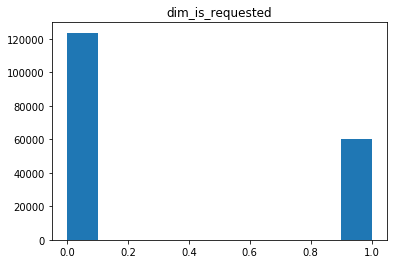

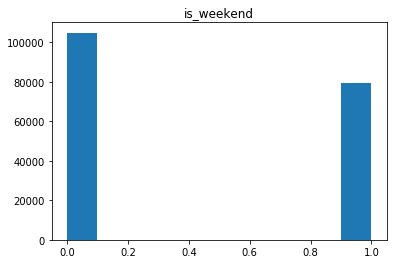

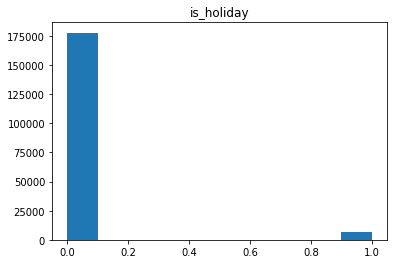

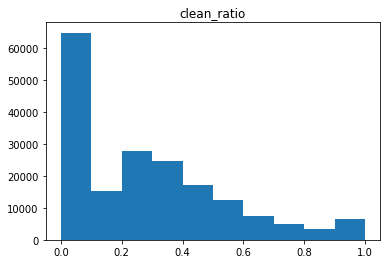

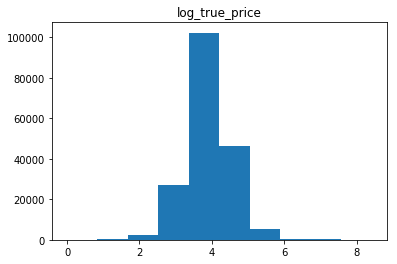

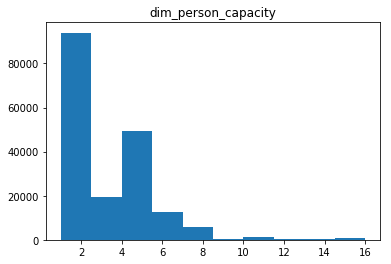

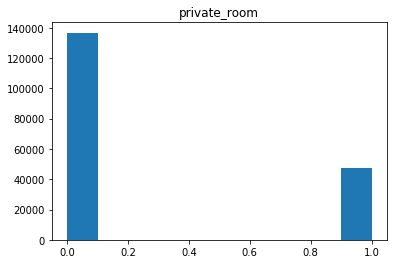

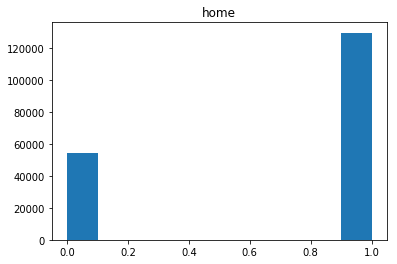

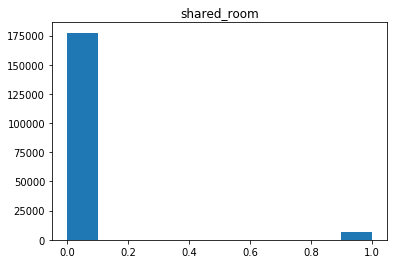

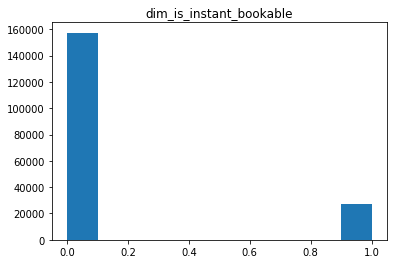

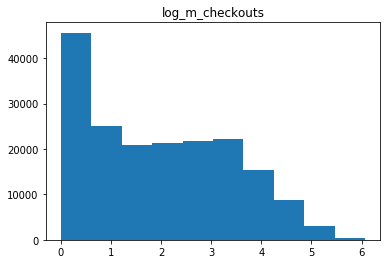

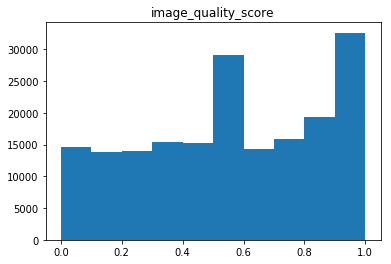

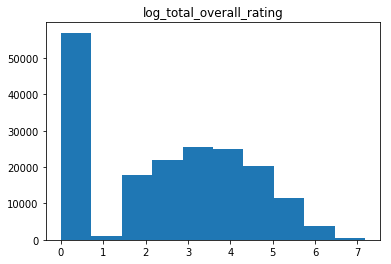

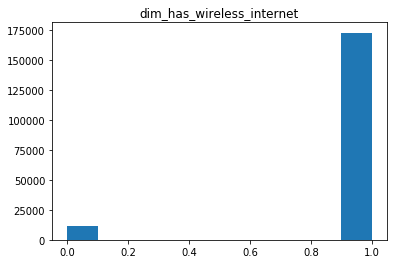

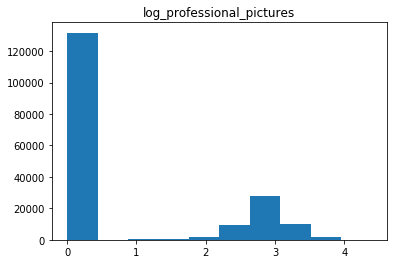

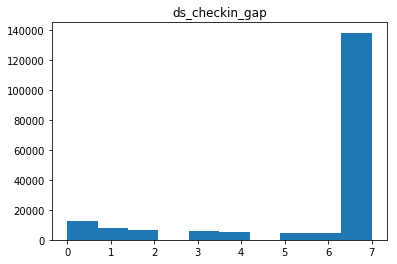

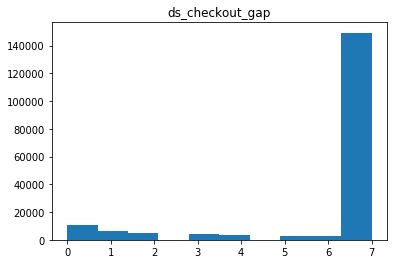

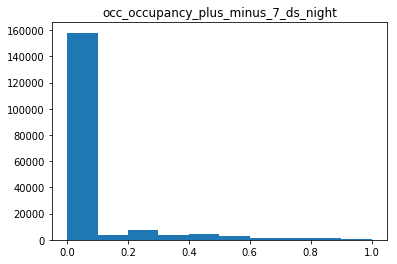

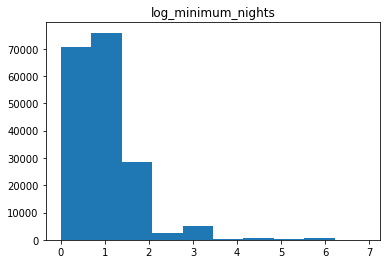

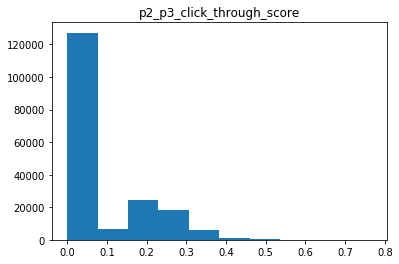

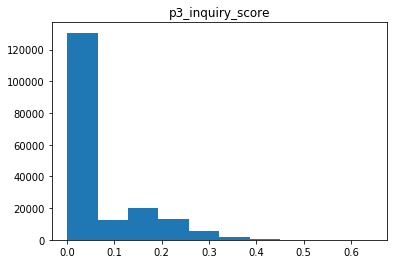

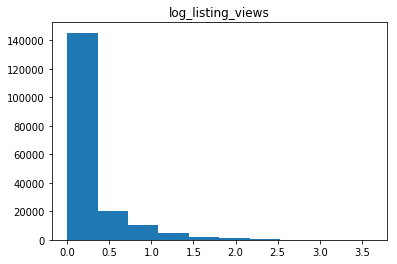

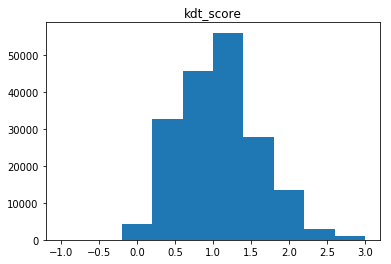

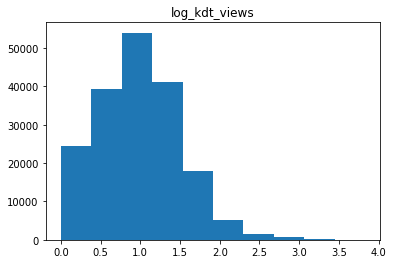

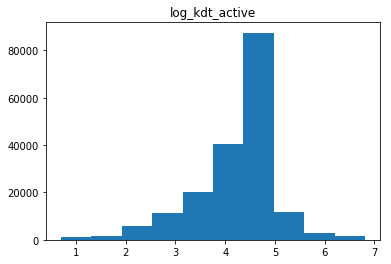

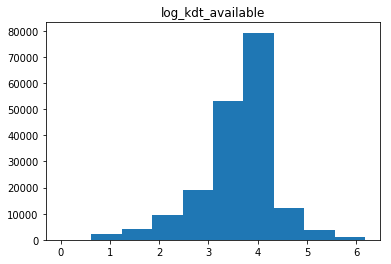

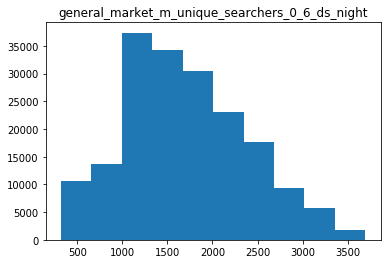

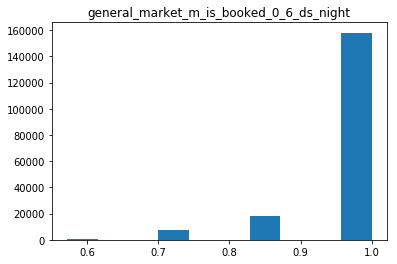

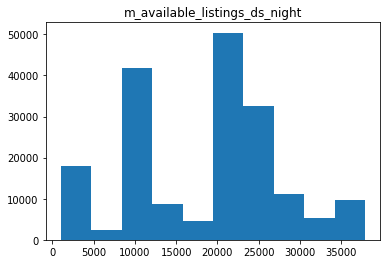

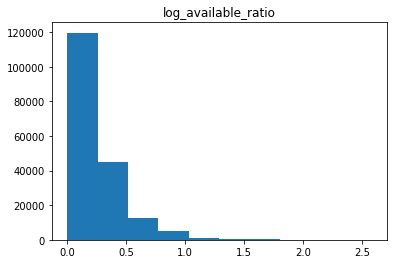

In [30]:
# Visualize the distribution of all features and dependent variables. 

for i in base_columns:
    counts, bins, fig = plt.hist(df[i])
    plt.title(i)
    plt.show()

### Model Building

#### Base Model

  1. Use LogisticRegression due to its easy of explanation for feature importance and impact
  2. Do cross validation
  3. Calculate the F1-score with different threshold

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_model)
df_model_norm = pd.DataFrame(np_scaled, columns=base_columns)

df_model_norm['dim_is_requested'] = df_model_norm['dim_is_requested'].map(lambda x: 1 if x else -1)
train, validation = train_test_split(df_model_norm, test_size=0.2)
validation.reset_index(inplace=True)
features = [i for i in base_columns if i != 'dim_is_requested']

model = LogisticRegressionCV(
    Cs=list(np.power(10.0, np.arange(-10, 10))), 
    penalty='l2', # 'l1', 'l2' 
    scoring='roc_auc',  # 'accuracy', 'roc_auc', 'neg_log_loss'
    cv=5, 
    random_state=777, 
    max_iter=10000, 
    fit_intercept=True, 
    solver='newton-cg',  # 'newton-cg', ‘lbfgs’, ‘sag’; ‘liblinear’
    tol=10
)
model_fit = model.fit(train[features], train['dim_is_requested'])

# The first column is the probability that the entry has the -1 label 
# and the second column is the probability that the entry has the +1 label.
prediction = pd.DataFrame(model_fit.predict_proba(validation[features]), columns=['NotBooked', 'Booked'])
print('For all market, accuracy %.3f'%(model_fit.score(validation[features], validation['dim_is_requested'])))

df_check = validation[['dim_is_requested']].join(prediction)

i_m, F1 = 0, 0
precision, recall = 0, 0
for i in [j / 30 for j in range(1,21)]:
    Y_true = df_check['dim_is_requested']
    Y_predict = df_check['Booked'].map(lambda x: 1 if x > i else -1)
    f = metrics.f1_score(Y_true, Y_predict)
    p = metrics.precision_score(Y_true, Y_predict)
    r = metrics.recall_score(Y_true, Y_predict)
    if f > F1:
        i_m, F1 = i, f
        precision, recall = p, r
print('Maximum F1 score is %.3f at %.3f with precision %.3f and recall %.3f.'%(F1, i_m, precision, recall))

For all market, accuracy 0.768
Maximum F1 score is 0.659 at 0.333 with precision 0.595 and recall 0.737.


In [32]:
# print(model_fit.coef_[0])

## Section II: Understanding Data And Improving Model

### Understand booking rate by market, by room type and by season

#### Remark:
1. Paris is very different from San Francisco and Los Angeles in overall booking rate and booking seasonality
2. There is no differences in room type books

In [33]:
# Booking rate by market

for i in ['Paris', 'San Francisco', 'Los Angeles']:
    l1 = len(df[df['dim_market'] == i])
    l2 = len(df[(df['dim_market'] == i) & (df['dim_is_requested'] == 1)])
    print('For %s, total listing: %d, booking rate: %.3f.'%(i, l1, l2 / l1))
print('Overall booking rate: %.3f.'%(len(df[df['dim_is_requested'] == 1])/len(df)))

For Paris, total listing: 113704, booking rate: 0.274.
For San Francisco, total listing: 17877, booking rate: 0.468.
For Los Angeles, total listing: 52698, booking rate: 0.398.
Overall booking rate: 0.328.


In [34]:
# Booking rate by room types

for i in ['Private room', 'Entire home/apt', 'Shared room']:
    l1 = len(df[df['dim_room_type'] == i])
    l2 = len(df[(df['dim_room_type'] == i) & (df['dim_is_requested'] == 1)])
    print('For %s, total listing: %d, the booking rate: %.3f.'%(i, l1, l2 / l1))

For Private room, total listing: 47546, the booking rate: 0.314.
For Entire home/apt, total listing: 129885, the booking rate: 0.332.
For Shared room, total listing: 6848, the booking rate: 0.355.


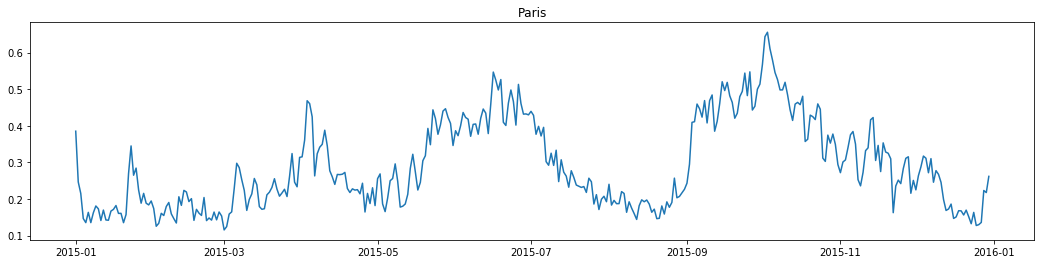

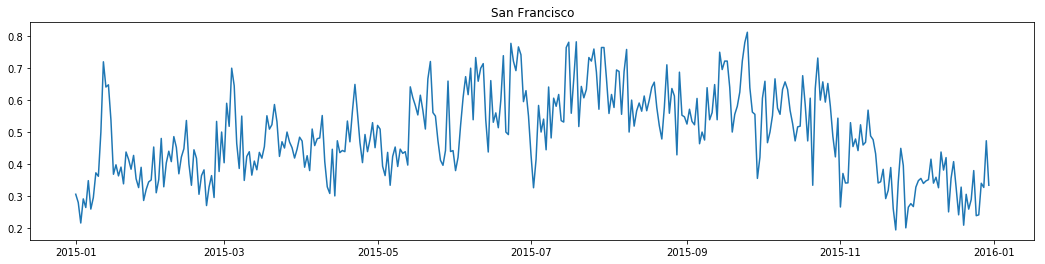

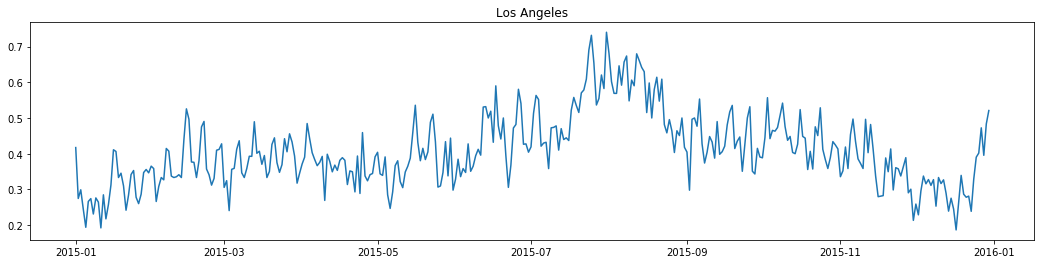

In [35]:
# Booking rate by date by market.

df_count = df[['ds_night', 'dim_is_requested', 'dim_market']].groupby(['ds_night', 'dim_market']).count().reset_index()
df_sum = df[['ds_night', 'dim_is_requested', 'dim_market']].groupby(['ds_night', 'dim_market']).sum().reset_index()

df_sum.rename(columns={'dim_is_requested':'Booked'}, inplace=True)
df_count.rename(columns={'dim_is_requested':'Count'}, inplace=True)
df_time = df_sum.merge(df_count, on=['ds_night','dim_market'])
df_time['ds_night'] = pd.to_datetime(df_time['ds_night'], infer_datetime_format=True)

for i in ['Paris', 'San Francisco', 'Los Angeles']:
    plt.figure(figsize=(18,4))
    plt.plot(df_time[df_time['dim_market'] == i].ds_night, 
             df_time[df_time['dim_market'] == i].Booked / df_time[df_time['dim_market'] == i].Count)
    plt.title(i)
    plt.show()
df_time[df_time['dim_market'] == 'Paris'].to_csv('Paris_bookings.csv')

In [36]:
# Obverse seasonality in Paris market
# Create a feature to indicate peak season for Paris

def peak_season(date, market):
    if market in ['Los Angeles', 'San Francisco']:
        return 0
    elif (date >= '2015-05-21' and date <= '2015-07-06') or (date >= '2015-09-03' and date <= '2015-10-24'):
        return 1
    else:
        return 0
    
df['peak_season'] = df[['ds_night', 'dim_market']].apply(lambda x: peak_season(x[0], x[1]), axis=1)

### Build Separate Models For Different Markets

In [37]:
df_coef = {}
df_threshold = {}
feature_importance = {}
for city in ['Paris', 'San Francisco', 'Los Angeles']:
    
    df_coef[city] = {}
    df_threshold[city] = []
    df_model = df[df['dim_market'] == city][base_columns + ['peak_season']]
    features = [i for i in base_columns if i != 'dim_is_requested'] + ['peak_season']
    df_coef[city]['features'] = features
        
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(df_model)
    df_model_norm = pd.DataFrame(np_scaled, columns=base_columns+['peak_season'])
    
    df_model_norm['dim_is_requested'] = df_model_norm['dim_is_requested'].map(lambda x: 1 if x == 1 else -1)
    train, validation = train_test_split(df_model_norm, test_size=0.2)
    validation.reset_index(inplace=True)
    

    model = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10))), 
        penalty='l2', # 'l1', 'l2' 
        scoring='roc_auc',  # 'accuracy', 'roc_auc', 'neg_log_loss'
        cv=5, 
        random_state=777, 
        max_iter=10000, 
        fit_intercept=True, 
        solver='newton-cg',  # 'newton-cg', ‘lbfgs’, ‘sag’; ‘liblinear’
        tol=10
    )
    model_fit = model.fit(train[features], train['dim_is_requested'])
    df_coef[city]['coef'] = model_fit.coef_[0]
    feature_importance[city] = np.std(train[features], 0) * model_fit.coef_[0]

    prediction = pd.DataFrame(model_fit.predict_proba(validation[features]), columns=['NotBooked', 'Booked'])
    print('For market %s:'%(city))
    print('Accuracy %.3f'%(model_fit.score(validation[features], validation['dim_is_requested'])))

    df_check = validation[['dim_is_requested']].join(prediction)

    i_m, F1 = 0, 0
    precision, recall = 0, 0
    for i in [j / 30 for j in range(1,30)]:
        Y_true = df_check['dim_is_requested']
        Y_predict = df_check['Booked'].map(lambda x: 1 if x > i else -1)
        f = metrics.f1_score(Y_true, Y_predict)
        p = metrics.precision_score(Y_true, Y_predict)
        r = metrics.recall_score(Y_true, Y_predict)
        df_threshold[city].append({'threshold':i, 'precision':p, 'recall':r, 'F1':f})
        if f > F1:
            i_m, F1 = i, f
            precision, recall = p, r
    print('Maximum F1 score is %.3f at %.3f with precision %.3f and recall %.3f.'%(F1, i_m, precision, recall))

For market Paris:
Accuracy 0.796
Maximum F1 score is 0.628 at 0.300 with precision 0.561 and recall 0.712.
For market San Francisco:
Accuracy 0.708
Maximum F1 score is 0.716 at 0.367 with precision 0.627 and recall 0.835.
For market Los Angeles:
Accuracy 0.747
Maximum F1 score is 0.716 at 0.367 with precision 0.645 and recall 0.805.


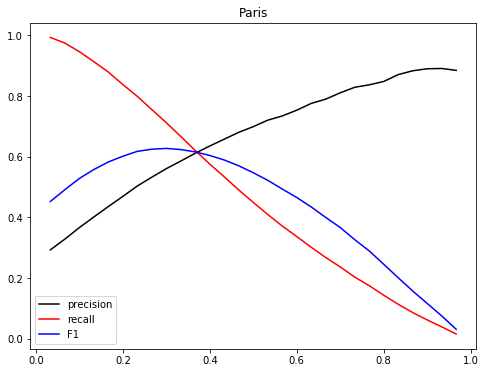

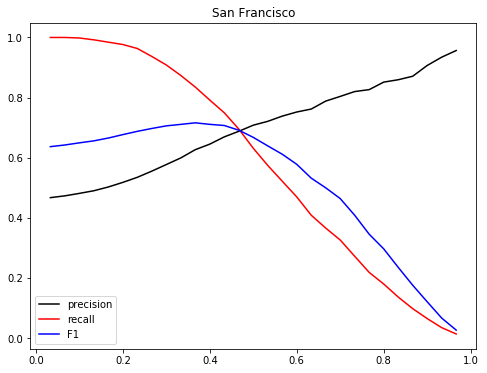

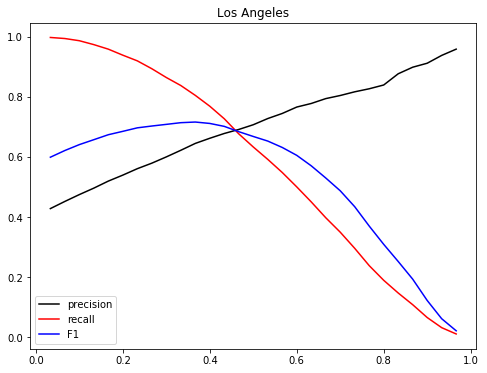

In [38]:
# Visualize how F1, precision and recall changes with threshold

for city in ['Paris', 'San Francisco', 'Los Angeles']:
    df_t = pd.DataFrame(df_threshold[city])
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(df_t['threshold'], df_t['precision'], color='black')
    ax.plot(df_t['threshold'], df_t['recall'], color='red')
    ax.plot(df_t['threshold'], df_t['F1'], color='blue')
    ax.legend()
    ax.set_title(city)
    plt.show()

#### Feature coefficients

In [39]:
for city in ['Paris', 'San Francisco', 'Los Angeles']:
    print('For Market %s:'%(city))
    df_t = pd.DataFrame(df_coef[city])
    df_t.sort_values(by=['coef'], ascending=False, inplace=True)
    filename = 'Coefficients_' + city + '.csv'
    df_t.to_csv(filename)
    print(df_t[['features', 'coef']])
    print('\n')

For Market Paris:
                                          features       coef
20                               log_listing_views   6.169635
23                                  log_kdt_active   2.857521
22                                   log_kdt_views   2.510590
6                                             home   1.615279
2                                      clean_ratio   1.456332
11                        log_total_overall_rating   1.178697
9                                  log_m_checkouts   0.930815
25  general_market_m_unique_searchers_0_6_ds_night   0.842532
5                                     private_room   0.750728
28                             log_available_ratio   0.663796
19                                p3_inquiry_score   0.623160
29                                     peak_season   0.593064
10                             image_quality_score   0.490706
12                       dim_has_wireless_internet   0.471673
8                          dim_is_instant_bookable  

#### Feature importance

In [40]:
for city in ['Paris', 'San Francisco', 'Los Angeles']:
    print('For market %s:'%(city))
    df_t = pd.DataFrame(feature_importance[city], columns=['Importance'])
    df_t = df_t.reset_index().rename(columns={'index':'Feature'})
    df_t.sort_values(by=['Importance'], ascending=False, inplace=True)
    print(df_t)

For market Paris:
                                           Feature  Importance
6                                             home    0.637891
20                               log_listing_views    0.612066
23                                  log_kdt_active    0.392101
2                                      clean_ratio    0.342968
22                                   log_kdt_views    0.333890
11                        log_total_overall_rating    0.319746
5                                     private_room    0.289567
29                                     peak_season    0.246084
9                                  log_m_checkouts    0.225570
25  general_market_m_unique_searchers_0_6_ds_night    0.191210
10                             image_quality_score    0.145860
8                          dim_is_instant_bookable    0.144055
12                       dim_has_wireless_internet    0.122875
19                                p3_inquiry_score    0.096019
28                             log_av

### Thank You

Have a great day.